In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loadind data into a dataframe
fpl = pd.read_csv(r"C:\Users\HP 820 G3\Documents\solar_data\fpl_data.csv")
fpl.head()

,Unnamed: 0,web_name,season_name,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,...,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,0,Fábio Vieira,2022/23,60,56,40,500,1,2,2,...,134,116.0,180.6,123.0,41.5,3,0.86,1.39,2.25,5.28
1,1,Fábio Vieira,2023/24,55,54,24,290,1,3,1,...,67,82.8,88.8,85.0,25.5,2,1.25,0.64,1.89,1.83
2,2,Jorginho,2018/19,50,46,96,3156,2,0,16,...,577,691.4,628.4,122.0,144.2,0,0.00,0.00,0.00,0.00
3,3,Jorginho,2019/20,50,49,92,2376,4,3,6,...,535,600.0,422.4,158.0,118.4,0,0.00,0.00,0.00,0.00
4,4,Jorginho,2020/21,50,47,114,2006,7,2,14,...,485,588.8,383.5,175.0,114.9,0,0.00,0.00,0.00,0.00


In [2]:
# checking column info
fpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2177 non-null   int64  
 1   web_name                    2177 non-null   object 
 2   season_name                 2177 non-null   object 
 3   start_cost                  2177 non-null   int64  
 4   end_cost                    2177 non-null   int64  
 5   total_points                2177 non-null   int64  
 6   minutes                     2177 non-null   int64  
 7   goals_scored                2177 non-null   int64  
 8   assists                     2177 non-null   int64  
 9   clean_sheets                2177 non-null   int64  
 10  goals_conceded              2177 non-null   int64  
 11  own_goals                   2177 non-null   int64  
 12  penalties_saved             2177 non-null   int64  
 13  penalties_missed            2177 

In [3]:
# selecting data for 2022/23 season and below
fpl_22 = fpl[~(fpl['season_name'] == '2023/24')]
fpl_22.head()

,Unnamed: 0,web_name,season_name,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,...,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,0,Fábio Vieira,2022/23,60,56,40,500,1,2,2,...,134,116.0,180.6,123.0,41.5,3,0.86,1.39,2.25,5.28
2,2,Jorginho,2018/19,50,46,96,3156,2,0,16,...,577,691.4,628.4,122.0,144.2,0,0.00,0.00,0.00,0.00
3,3,Jorginho,2019/20,50,49,92,2376,4,3,6,...,535,600.0,422.4,158.0,118.4,0,0.00,0.00,0.00,0.00
4,4,Jorginho,2020/21,50,47,114,2006,7,2,14,...,485,588.8,383.5,175.0,114.9,0,0.00,0.00,0.00,0.00
5,5,Jorginho,2021/22,60,57,106,2271,6,2,12,...,519,605.8,429.3,214.0,125.1,0,0.00,0.00,0.00,0.00


In [4]:
# checking shape of the data
fpl_22.shape

(1706, 28)

In [5]:
# dropping unnecessary columns in the dataframe
cols = ['Unnamed: 0', 'web_name', 'season_name']
fpl_22.drop(cols, axis=1, inplace=True)

C:\Users\HP 820 G3\AppData\Local\Temp\ipykernel_16892\5500444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpl_22.drop(cols, axis=1, inplace=True)


<Axes: >

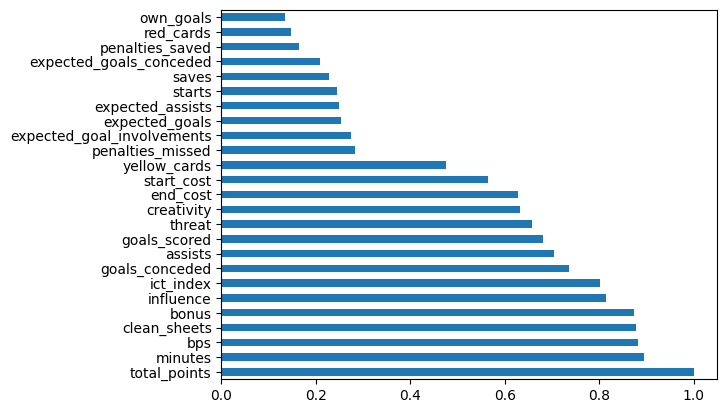

In [6]:
# plotting the pearson correlations of other features with the 'total_points' column
fpl_22.corr()['total_points'].sort_values(ascending=False).plot.barh()


interval columns not set, guessing: ['start_cost', 'end_cost', 'total_points', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'expected_goals_conceded']


<Axes: >

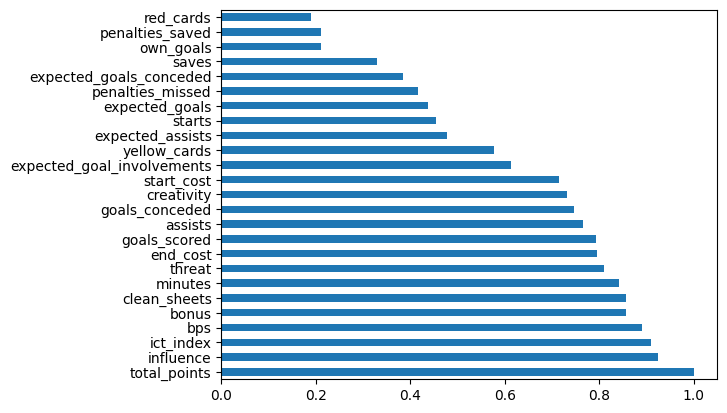

In [7]:
import phik

# plotting the phik correlations with the 'total_points' feature
fpl_22.phik_matrix()['total_points'].sort_values(ascending=False).plot.barh()

In [8]:
# droping features with phik correlation less than 0.6
top_phik = fpl_22.phik_matrix()['total_points'].sort_values(ascending=False)
top_phik = top_phik[top_phik.values > 0.6]
top_phik

interval columns not set, guessing: ['start_cost', 'end_cost', 'total_points', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'expected_goals_conceded']


total_points                  1.000000
influence                     0.924852
ict_index                     0.909213
bps                           0.889995
bonus                         0.857058
clean_sheets                  0.856958
minutes                       0.841101
threat                        0.809817
end_cost                      0.795531
goals_scored                  0.792279
assists                       0.765294
goals_conceded                0.745560
creativity                    0.730767
start_cost                    0.714837
expected_goal_involvements    0.612138
Name: total_points, dtype: float64

In [9]:
# selecting features with phik  correlation greater than 0.6
fpl_eng = fpl[top_phik.index]
fpl_eng.head()

,total_points,influence,ict_index,bps,bonus,clean_sheets,minutes,threat,end_cost,goals_scored,assists,goals_conceded,creativity,start_cost,expected_goal_involvements
0,40,116.0,41.5,134,2,2,500,123.0,56,1,2,5,180.6,60,2.25
1,24,82.8,25.5,67,0,1,290,85.0,54,1,3,2,88.8,55,1.89
2,96,691.4,144.2,577,4,16,3156,122.0,46,2,0,37,628.4,50,0.00
3,92,600.0,118.4,535,9,6,2376,158.0,49,4,3,40,422.4,50,0.00
4,114,588.8,114.9,485,15,14,2006,175.0,47,7,2,17,383.5,50,0.00


In [10]:
# importing pycaret for regression
from pycaret.regression import *

# seting up pycaret and comparing models
reg_model = setup(fpl_eng, target='total_points')
best_model = compare_models(sort='MAE')


,Description,Value
0,Session id,4826
1,Target,total_points
2,Target type,Regression
3,Original data shape,"(2177, 15)"
4,Transformed data shape,"(2177, 15)"
5,Transformed train set shape,"(1523, 15)"
6,Transformed test set shape,"(654, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,4.6947,52.0775,7.1818,0.9825,0.1799,0.1453,3.6930
et,Extra Trees Regressor,4.9203,55.7833,7.4441,0.9811,0.1486,0.1284,0.5630
lightgbm,Light Gradient Boosting Machine,5.0210,57.8711,7.5617,0.9804,0.1732,0.1444,0.2330
gbr,Gradient Boosting Regressor,5.4151,62.8101,7.8951,0.9788,0.2374,0.1599,0.3920
xgboost,Extreme Gradient Boosting,5.6074,73.5376,8.5420,0.9752,0.1677,0.1450,0.2270
rf,Random Forest Regressor,5.6176,75.2818,8.6393,0.9746,0.1608,0.1401,0.9500
lr,Linear Regression,6.2909,79.1668,8.8628,0.9733,0.4745,0.1930,0.9420
ridge,Ridge Regression,6.2909,79.1631,8.8626,0.9733,0.4747,0.1930,0.0320
br,Bayesian Ridge,6.2982,79.2073,8.8661,0.9732,0.4785,0.1939,0.0290
llar,Lasso Least Angle Regression,6.3303,80.3413,8.9331,0.9728,0.4564,0.1885,0.0350


from model comparison above the best model is catboost ranked according to MAE(mean absolute error)

In [11]:
# creating the catboost model
cat_model = create_model('catboost', fold=5)
# optimizing the model
best_cat, tuner = tune_model(cat_model, fold=3, optimize='MAE', search_library='scikit-optimize', return_tuner=True)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.6528,53.5503,7.3178,0.9808,0.2001,0.1611
1,5.0549,59.0022,7.6813,0.9798,0.1757,0.1382
2,4.7529,51.4951,7.1760,0.9839,0.1846,0.1288
3,4.6545,45.1270,6.7177,0.9840,0.1841,0.1537
4,4.6221,53.4302,7.3096,0.9829,0.1885,0.1450
Mean,4.7474,52.5210,7.2405,0.9823,0.1866,0.1454
Std,0.1599,4.4635,0.3107,0.0017,0.0079,0.0113


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.8898,100.0742,10.0037,0.9650,0.3755,0.1940
1,6.8995,94.2054,9.7059,0.9690,0.5304,0.2086
2,6.5903,84.8878,9.2135,0.9718,0.4951,0.2513
Mean,6.7932,93.0558,9.6410,0.9686,0.4670,0.2179
Std,0.1436,6.2529,0.3259,0.0028,0.0663,0.0243


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


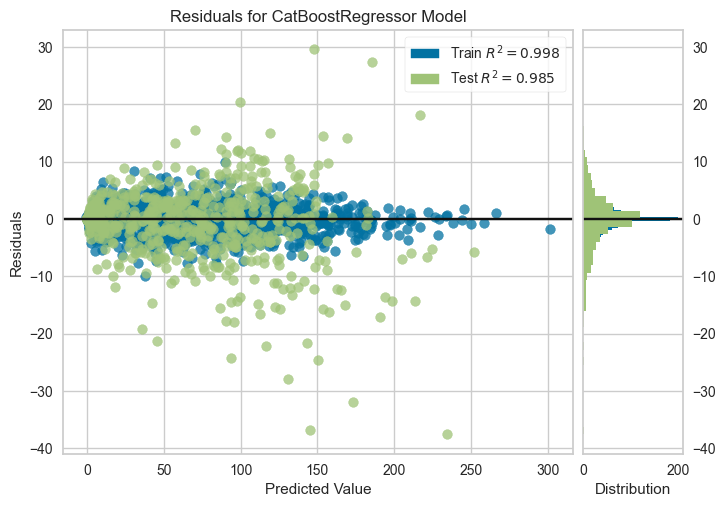

In [12]:
# plotting the model r squared score
plot_model(best_cat)

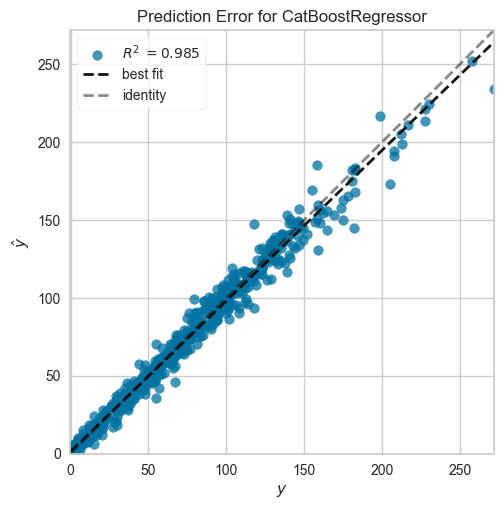

In [13]:
# plotting the error 
plot_model(best_cat, plot='error')

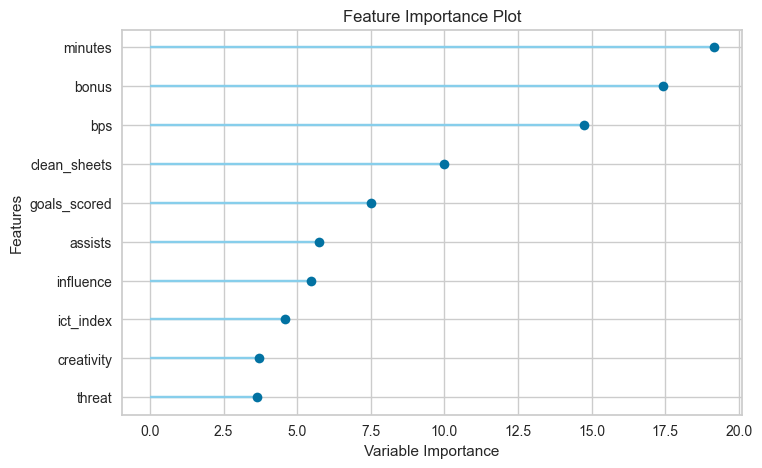

In [14]:
# plotting the feature importance
plot_model(best_cat, plot='feature')

In [15]:
# evaluating the model
evaluate_model(best_cat)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
# selecting the 2023/24 data for prediction
fpl_24 = fpl[fpl['season_name'] == '2023/24']

In [17]:
# predicting using the model
fpl_prediction = predict_model(best_cat, data=fpl_24)
fpl_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2.2626,14.6245,3.8242,0.9944,0.1923,0.1095


,Unnamed: 0,web_name,season_name,start_cost,end_cost,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,prediction_label
1,1,Fábio Vieira,2023/24,55,54,290,1,3,1,2,...,88.800003,85.0,25.500000,2,1.25,0.64,1.89,1.83,24,24.403201
7,7,Jorginho,2023/24,55,53,913,0,2,4,11,...,187.800003,16.0,36.799999,10,0.10,1.77,1.87,8.42,44,40.046691
12,12,Martinelli,2023/24,80,75,2010,6,5,10,23,...,717.099976,795.0,200.800003,24,6.36,5.18,11.53,14.88,118,113.964780
19,19,Nelson,2023/24,50,48,256,0,0,1,1,...,87.699997,39.0,16.900000,1,0.18,0.43,0.61,2.18,16,13.623915
21,21,Nwaneri,2023/24,45,45,13,0,0,0,0,...,12.300000,4.0,1.800000,0,0.00,0.05,0.05,0.13,1,2.444836


In [18]:
# sorting data by 'total_points'
fpl_prediction.sort_values(by='total_points', ascending=False).head(15)

,Unnamed: 0,web_name,season_name,start_cost,end_cost,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,prediction_label
268,268,Palmer,2023/24,50,63,2617,22,13,7,46,...,1022.500000,1016.0,327.799988,29,17.350000,8.17,25.520000,45.480000,244,243.875809
527,527,Foden,2023/24,75,85,2860,19,8,14,27,...,1157.800049,1172.0,348.799988,33,10.170000,6.95,17.120001,28.510000,230,224.699737
910,910,Watkins,2023/24,80,89,3222,19,18,7,56,...,588.500000,1420.0,302.799988,37,16.740000,4.02,20.760000,55.049999,228,213.736339
39,39,Saka,2023/24,85,88,2922,16,12,16,27,...,1319.800049,1342.0,375.700012,35,15.400000,10.90,26.290001,25.660000,226,226.353232
1034,1034,Haaland,2023/24,140,143,2553,27,8,11,25,...,367.200012,1581.0,303.299988,29,29.570000,2.18,31.750000,25.650000,217,211.004975
803,803,Son,2023/24,90,100,2934,17,10,8,51,...,921.900024,1131.0,304.700012,34,11.490000,7.87,19.360001,53.770000,213,209.287433
492,492,M.Salah,2023/24,125,134,2531,18,12,8,30,...,892.200012,1531.0,346.000000,28,20.889999,7.47,28.360001,32.220001,211,210.737682
25,25,Ødegaard,2023/24,85,86,3098,8,11,19,23,...,1499.400024,757.0,317.000000,35,7.530000,10.16,17.690001,25.260000,186,184.610174
645,645,Gordon,2023/24,55,64,2896,11,16,12,48,...,843.700012,905.0,256.700012,34,10.030000,5.40,15.420000,51.730000,183,183.159900
1138,1138,White,2023/24,55,61,2987,4,5,18,26,...,589.400024,234.0,159.000000,35,1.270000,3.66,4.930000,24.950001,182,179.408084


from the results, the top players scored the most points hence our model performs quite well